In [1]:
import numpy as np
print(np.__version__)


1.26.4


In [8]:
import zipfile

with zipfile.ZipFile("garbage_classification.zip", 'r') as zip_ref:
    zip_ref.extractall("garbage_classification")



In [12]:
import numpy as np
import cv2

print("NumPy version:", np.__version__)
print("OpenCV version:", cv2.__version__)


NumPy version: 1.26.4
OpenCV version: 4.12.0


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
data_path = "."  # This means: look in the same folder as the notebook
categories = ["biological", "battery"]
data = []
labels = []
img_size = 128


In [9]:
import os
import cv2
import numpy as np

# Set the path to the dataset folder (subfolder where biological and battery folders exist)
data_path = "garbage_classification/garbage_classification"
categories = ["biological", "battery"]

# Initialize lists to store data and labels
data = []
labels = []
img_size = 128  # Resize all images to 128x128

# Load and preprocess images
for label, category in enumerate(categories):
    folder_path = os.path.join(data_path, category)
    print(f"\n📂 Loading category: {category}")
    
    for file in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)
        except Exception as e:
            print(f"❌ Skipped {file} due to: {e}")

print(f"\n✅ Total images loaded: {len(data)}")



📂 Loading category: biological

📂 Loading category: battery

✅ Total images loaded: 1407


In [11]:
data = np.array(data)
labels = np.array(labels)


In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

# Normalize and one-hot encode labels
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(128, 128, 3)),  # 👈 Separate input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])


In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [37]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9681 - val_loss: 0.1979
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9610 - val_loss: 0.2051
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 1.0000 - loss: 9.3256e-04 - val_accuracy: 0.9610 - val_loss: 0.2064
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 1.0000 - loss: 6.4811e-04 - val_accuracy: 0.9574 - val_loss: 0.2138
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 1.0000 - loss: 5.4079e-04 - val_accuracy: 0.9574 - val_loss: 0.2205
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 1.0000 - loss: 4.7024e-04 - val_accuracy: 0.9574 - val_loss: 0.2232
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 1.0000 - loss: 4.2127e-04 - val_accuracy: 0.9539 - val_loss: 0.2325
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 1.0000 - loss: 4.575

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f" Final Test Accuracy: {accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9506 - loss: 0.2263
 Final Test Accuracy: 95.74%


In [33]:
model.save("garbage_classifier_model.keras")



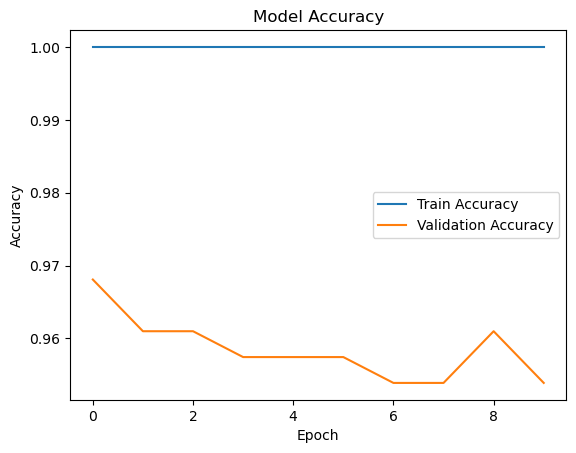

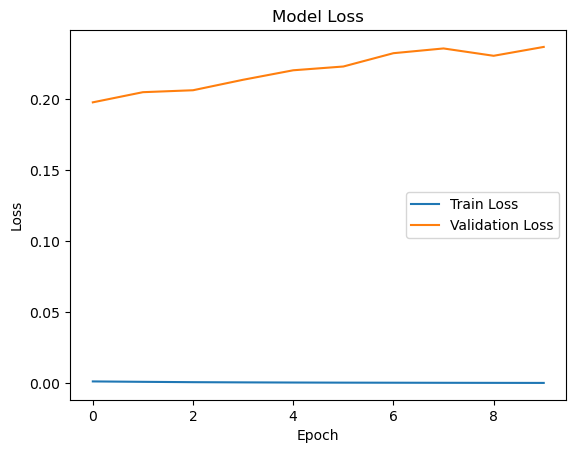

In [39]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [55]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Correct path
img_path = "garbage_classification/garbage_classification/biological/biological1.jpg"


# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)
predicted_class = categories[np.argmax(prediction)]

print("✅ Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
✅ Predicted Class: battery


In [57]:
import os
os.getcwd()


'C:\\Users\\TANURISHREE\\Garbage Classification'